In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import folium

In [2]:
#Cargar datos
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")
df = pd.read_csv("200504COVID19MEXICO.csv", encoding = "ISO-8859-1")
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2
1,04/05/2020,0cc140,2,3,15,1,28,15,20,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,04/05/2020,0e0689,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,04/05/2020,1b81dc,2,3,2,1,8,2,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,04/05/2020,0b7b4d,2,3,27,2,27,27,3,2,...,2,1,1,2,2,1,99,MÃ©xico,99,2


In [3]:
#valores nulos
df.isnull().values.any()

False

In [4]:
cols=["SEXO","RESULTADO","EPOC","NEUMONIA","INTUBADO","DIABETES","ASMA","INMUSUPR","HIPERTENSION",'OTRA_COM','CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO']
df[cols]=df[cols].replace([3,97,98,99],np.nan)
df[cols]=df[cols].replace(2,0)

In [5]:
lista_def=[]
for i in df["FECHA_DEF"]:
    if i=="9999-99-99":
        lista_def.append(0)
    else:
        lista_def.append(1)
df["MUERTES"]=lista_def

In [6]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI', 'MUERTES'],
      dtype='object')

In [7]:
#Numero total de pacientes:
df.shape[0]

100041

In [8]:
#Numero de negativos en covid-19
df[df["RESULTADO"]==1].shape[0]

24905

In [9]:
#Numero de muertes con covid positivo y resultado pendiente:
df[df["FECHA_DEF"]!="9999-99-99" ].shape[0]


3580

In [10]:
df[(df["RESULTADO"].isin([1,np.nan]))&(df["FECHA_DEF"]!="9999-99-99")].shape

(2460, 36)

In [11]:
#Numero de pacientes en UCI por covid pos:
df[(df["UCI"]==1)&(df["RESULTADO"]==1)].shape[0]

1015

In [12]:
#Creo columna de enfermedades:
cols_enf=df[['EPOC','NEUMONIA','DIABETES','ASMA','INMUSUPR','HIPERTENSION',
   'OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO']]
df['ENF'] = cols_enf.sum(axis=1)


In [13]:
#Numero de personas que han dado positivo sin enfermedades o factores de riesgo previos:
df[(df["ENF"]==0)&(df["RESULTADO"]==1)].shape[0]

9580

In [14]:
#Numero de personas que han fallecido sin enfermedades o factores de riesgo previos:
df[(df["RESULTADO"]==1)&(df["ENF"]==0)&(df["FECHA_DEF"]!="9999-99-99")].shape[0]

134

In [15]:
#Numero de personas que han fallecido con enfermedades o factores de riesgo previos:
df[(df["RESULTADO"]==1)&(df["ENF"]!=0)&(df["FECHA_DEF"]!="9999-99-99")].shape[0]

2136

In [16]:
#Numero de personas intubadas
df["INTUBADO"].value_counts()

0.0    24804
1.0     2001
Name: INTUBADO, dtype: int64

In [17]:
#Personas intubadas con enfermedades previas
df[(df["RESULTADO"]==1)&(df["INTUBADO"]==1)&(df["ENF"]!=0)].shape[0]


1020

In [18]:
#Personas intubadas sin enfermedades previas
df[(df["RESULTADO"]==1)&(df["INTUBADO"]==1)&(df["ENF"]==0)].shape[0]


12

In [19]:
#Lista con num de intubados por factor de riesgo:
df_int=df[(df["RESULTADO"]==1)&(df["INTUBADO"]==1)]
lista_count=[]
lista_enf=['EPOC','NEUMONIA','DIABETES','ASMA','INMUSUPR','HIPERTENSION',
   'OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO']
for i in cols_enf:
    lista_count.append(df[df[i]==1][i].sum())

In [20]:
lista_count

[2539.0,
 18534.0,
 13481.0,
 4480.0,
 2402.0,
 17459.0,
 4802.0,
 3089.0,
 16314.0,
 2380.0,
 9671.0]

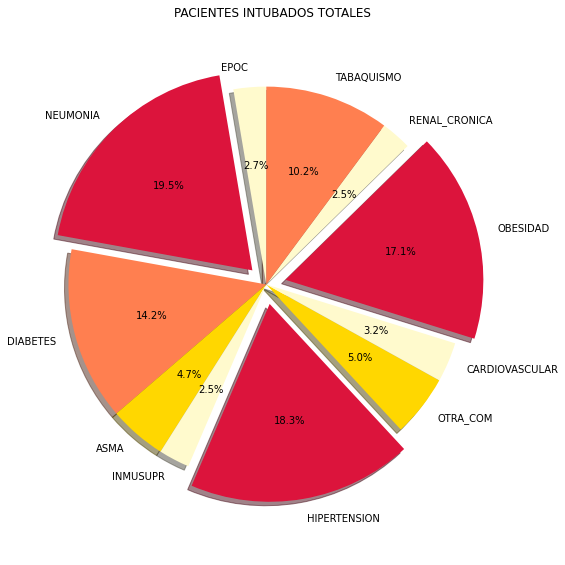

In [21]:
# Grafica por sectores 
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

labels = lista_enf
sizes = lista_count

explode = (0, 0.1, 0, 0, 0, 0.1, 0, 0, 0.1, 0, 0)
colores=["#FFFACD", "#DC143C", "#FF7F50", "#FFD700", "#FFFACD", "#DC143C", "#FFD700", "#FFFACD", "#DC143C", "#FFFACD", "#FF7F50"]

ax.pie(sizes, explode=explode, labels=labels,colors=colores, autopct='%1.1f%%',shadow=True, startangle=90)

ax.axis('equal')
plt.title("PACIENTES INTUBADOS TOTALES")
plt.tight_layout()
plt.show()

In [22]:
#Tiempo promedio entre la fecha de síntomas y la fecha de defunción de los que han dado positivo:


In [23]:
df["FECHA_DEF"]= df["FECHA_DEF"].replace("9999-99-99",np.nan)

In [24]:
#Cambiar a date time varias cols
from datetime import datetime
cols_fechas=['FECHA_INGRESO', 'FECHA_SINTOMAS',"FECHA_DEF"]
df[cols_fechas]=df[cols_fechas].apply(pd.to_datetime, format="%d/%m/%Y")

In [25]:
#Promedio en uci/muertes
tiempo_uci=df["FECHA_DEF"]- df["FECHA_INGRESO"]
tiempo_uci.mean()

Timedelta('5 days 05:04:05.363128')

In [26]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI', 'MUERTES', 'ENF'],
      dtype='object')

In [27]:
df["TIEMPO_UCI"]=df["FECHA_DEF"]- df["FECHA_INGRESO"]

In [28]:
df3=df[(df["ENF"]!=0)&(df["UCI"]==1)&(df["MUERTES"]==0)]
df3[df3['OBESIDAD']==1]["TIEMPO_UCI"].max()
lista_enf=['EPOC','NEUMONIA','DIABETES','ASMA','INMUSUPR','HIPERTENSION',
   'OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO']
lista_count=[2539.0,18534.0,13481.0,4480.0,2402.0,17459.0,4802.0,3089.0,16314.0,2380.0,9671.0]
maximo=[]
media=[]
muertes=[]
for i in lista_enf:
    day_max=(df3[df3[i]==1]["TIEMPO_UCI"].max()).days
    day_media=(df3[df3[i]==1]["TIEMPO_UCI"].mean()).days
    muer=df[(df["MUERTES"]==1)&(df["ENF"]!=0)][i].sum()
    maximo.append(day_max)
    muertes.append(muer)
    media.append(day_media)

lista_count.append(df[(df["ENF"]==0)&df["INTUBADO"]==1]["INTUBADO"].sum())
maximo.append(df[df["ENF"]==0]["TIEMPO_UCI"].max().days) 
media.append(df[df["ENF"]==0]["TIEMPO_UCI"].mean().days)
muertes.append(df[(df["MUERTES"]==0)&(df["ENF"]==0)]["MUERTES"].sum())
lista_enf.append("SIN FACTOR DE RIESGO")
df_uci=pd.DataFrame(columns=["Max en UCI(dias)","Media en UCI(dias)","Intubados totales","Decesos totales"],
                   index=lista_enf)
df_uci["Max en UCI(dias)"]=maximo
df_uci["Media en UCI(dias)"]=media
df_uci["Intubados totales"]=lista_count
df_uci["Decesos totales"]=muertes
df_uci

,Max en UCI(dias),Media en UCI(dias),Intubados totales,Decesos totales
EPOC,NaN,NaN,2539.0,322.0
NEUMONIA,NaN,NaN,18534.0,2584.0
DIABETES,NaN,NaN,13481.0,1440.0
ASMA,NaN,NaN,4480.0,100.0
INMUSUPR,NaN,NaN,2402.0,207.0
HIPERTENSION,NaN,NaN,17459.0,1540.0
OTRA_COM,NaN,NaN,4802.0,294.0
CARDIOVASCULAR,NaN,NaN,3089.0,310.0
OBESIDAD,NaN,NaN,16314.0,943.0
RENAL_CRONICA,NaN,NaN,2380.0,335.0


In [29]:
df[df["MUERTES"]==0]["FECHA_DEF"]

1        NaT
2        NaT
3        NaT
6        NaT
7        NaT
          ..
100036   NaT
100037   NaT
100038   NaT
100039   NaT
100040   NaT
Name: FECHA_DEF, Length: 96461, dtype: datetime64[ns]

In [30]:
i="EPOC"
df3[df3[i]==1]["TIEMPO_UCI"].max().days

nan

In [31]:
for i in cols_enf:
    print(df3[df3["OBESIDAD"]==1]["TIEMPO_UCI"].max())
    i[0]
 

NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT


In [32]:
str(df3[df3['EPOC']==1]["TIEMPO_UCI"].max())

'NaT'

In [33]:
muertes=df[df["FECHA_DEF"]!="01/01/2000"]
muertes = muertes["FECHA_DEF"].value_counts()
total_muert = muertes.cumsum()
total_muert

2020-04-25     157
2020-04-26     308
2020-04-24     457
2020-04-21     606
2020-04-23     745
2020-04-22     880
2020-04-19    1013
2020-04-20    1145
2020-04-27    1273
2020-04-28    1396
2020-04-29    1517
2020-04-14    1632
2020-04-15    1742
2020-04-16    1851
2020-04-10    1958
2020-04-18    2063
2020-04-17    2165
2020-04-11    2266
2020-04-12    2364
2020-04-13    2461
2020-04-07    2557
2020-05-02    2653
2020-04-30    2745
2020-05-01    2833
2020-04-09    2919
2020-04-06    2994
2020-04-08    3066
2020-04-04    3123
2020-03-31    3178
2020-04-02    3229
2020-04-03    3280
2020-04-05    3331
2020-05-03    3378
2020-04-01    3421
2020-03-30    3459
2020-03-28    3484
2020-03-29    3508
2020-03-27    3528
2020-03-26    3545
2020-05-04    3552
2020-03-24    3557
2020-03-25    3561
2020-03-22    3564
2020-03-18    3567
2020-03-16    3569
2020-03-23    3571
2020-03-17    3572
2020-03-19    3573
2020-02-10    3574
2020-01-15    3575
2020-02-23    3576
2020-01-29    3577
2020-03-09  

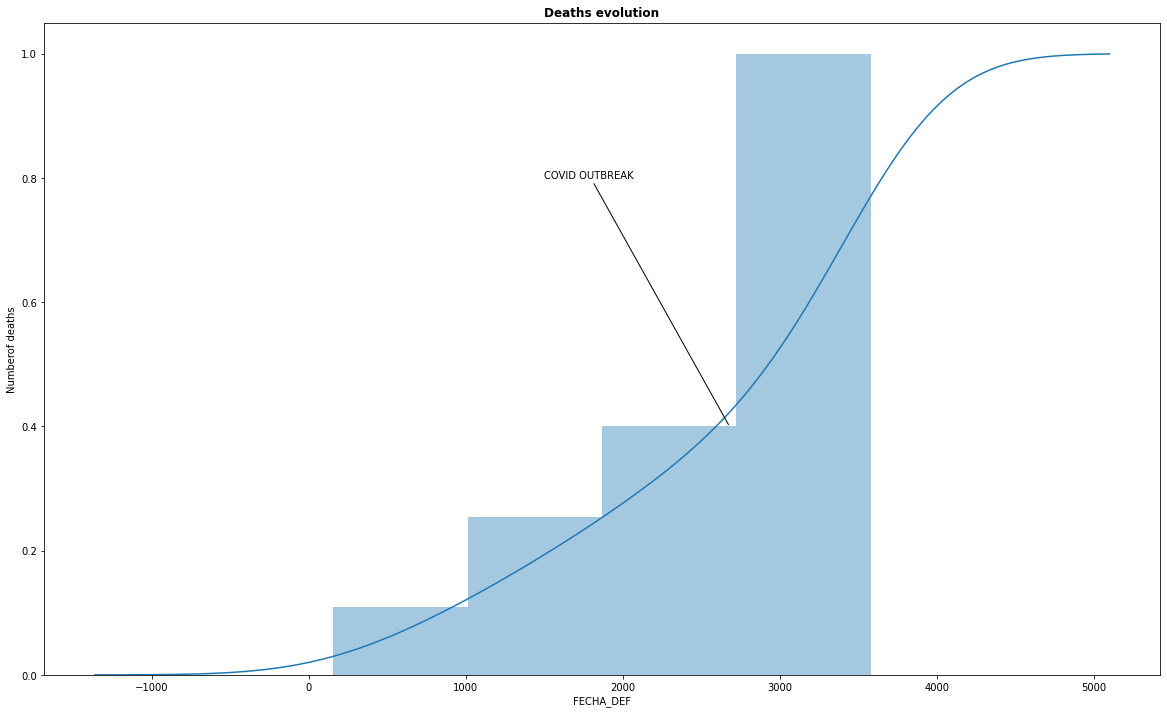

In [34]:
kwargs = {'cumulative': True}
fig, ax = plt.subplots(figsize=(20,12))
plt.title('Deaths evolution',weight = "bold")
plt.annotate(xy =(2680,0.4),xytext = (1500,0.8), s = "COVID OUTBREAK", arrowprops =dict(arrowstyle ="-"))
plt.xlabel('Date')  
plt.ylabel('Numberof deaths')
sns.distplot(total_muert, hist_kws=kwargs, kde_kws=kwargs)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 <a list of 55 Text major ticklabel objects>)

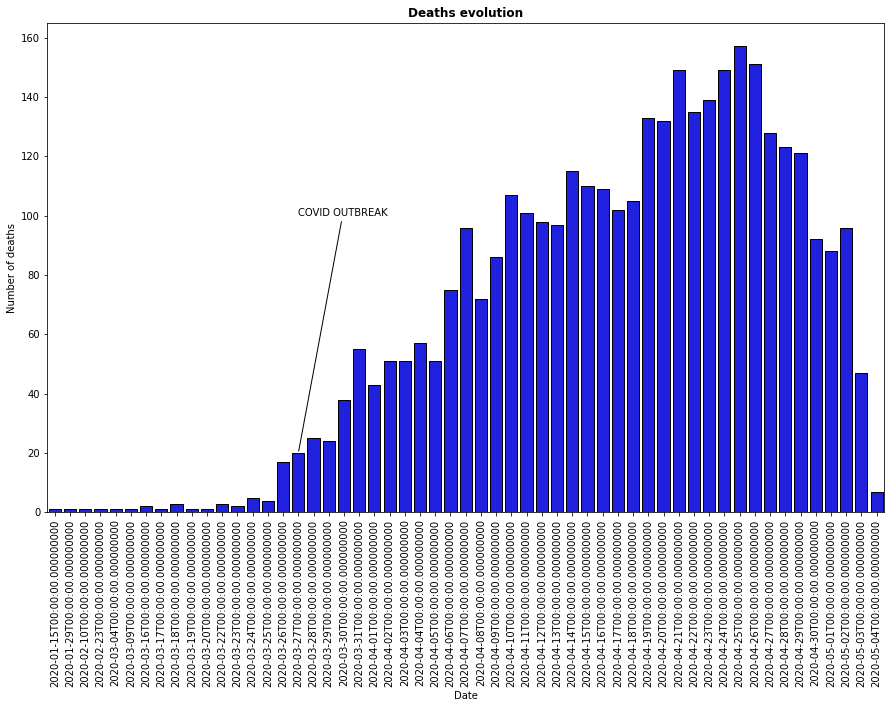

In [35]:
df3=df[df["FECHA_DEF"]!="01/01/2000"]
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(df3["FECHA_DEF"], color = "blue",edgecolor="black")
plt.title('Deaths evolution',weight = "bold")  
plt.xlabel('Date')  
plt.ylabel('Number of deaths')
plt.annotate(xy =(16,20),xytext = (16,100), s = "COVID OUTBREAK", arrowprops =dict(arrowstyle ="-"))
plt.xticks(rotation=90)


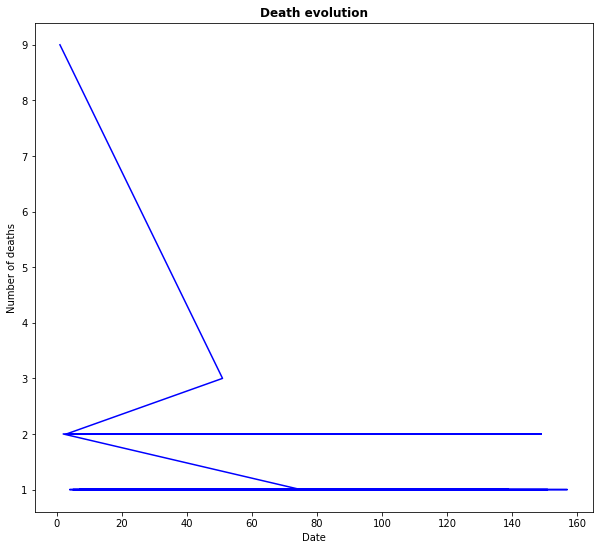

In [36]:
fig, ax = plt.subplots(figsize=(10,9))
plt.title('Death evolution',weight = "bold")  
plt.xlabel('Date')  
plt.ylabel('Number of deaths')  
#plt.annotate(xy =(0.01,20),xytext = (0.01,100), s = "start", arrowprops =dict(arrowstyle ="-"))
plt.plot(muertes.value_counts(), color="b")

In [37]:
#Ranking de enfermedades en positivos
cols_enf=['EPOC','NEUMONIA','DIABETES','ASMA','INMUSUPR','HIPERTENSION',
'OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO']
pos=df[df["RESULTADO"]==1][cols_enf]
pos.sum().sort_values(ascending=False)

NEUMONIA          7418.0
HIPERTENSION      5450.0
OBESIDAD          5272.0
DIABETES          4653.0
TABAQUISMO        2212.0
OTRA_COM           965.0
ASMA               828.0
CARDIOVASCULAR     718.0
RENAL_CRONICA      622.0
EPOC               610.0
INMUSUPR           445.0
dtype: float64

In [38]:
#Cantidad de pacientes intubados totales:
df[df["RESULTADO"]==1]["INTUBADO"].sum()



1032.0

In [39]:
#Pacientes intubados en UCI:
df[(df["RESULTADO"]==1)&(df["UCI"]==1)]["INTUBADO"].sum()

547.0

#### GRAFICAS

In [41]:
#UNIR los dos dataframes
df2= df.rename(columns={"MUNICIPIO_RES":"Clave Municipio","ENTIDAD_RES":"Clave Estado"})
df2= pd.merge(left=df2, right=dfm, on =["Clave Municipio","Clave Estado"])


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

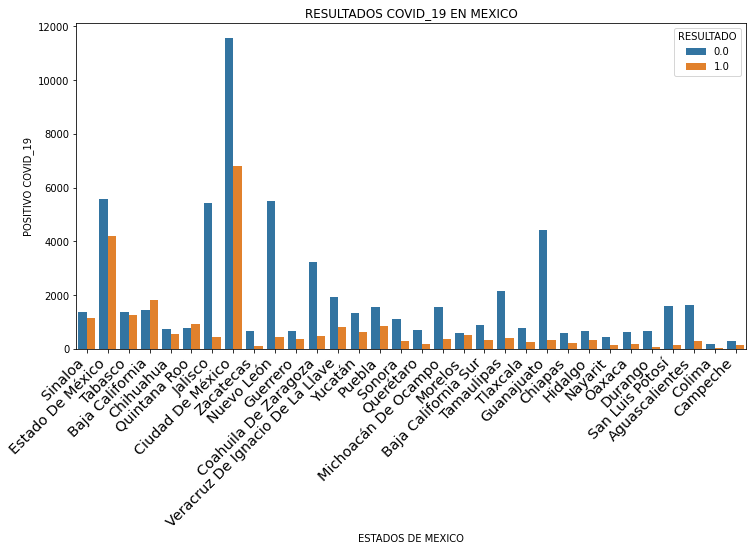

In [43]:
#Positivos/Negativos por estado
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(df2['Estado'],hue=df2["RESULTADO"])
ax.set(xlabel='ESTADOS DE MEXICO', ylabel='POSITIVO COVID_19')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
new_labels = ['NEGATIVO', 'POSITIVO']



plt.title("RESULTADOS COVID_19 EN MEXICO")
plt.show()

In [44]:
#Municipio con max de positivos por estado:
df_pos=df2[df2["RESULTADO"]==1]
df_pos=df_pos.groupby(["Estado","Municipio"]).count().iloc[:,0:3]
lista_unicos=df_pos["Estado"].unique()
lista_mun=[]
lista_values=[]
for i in lista_unicos:
    lista_mun.append(df_pos[df_pos["Estado"]==i].max()[1])
    lista_values.append(df_pos[df_pos["Estado"]==i].max()[2])
df_max=pd.DataFrame(columns=["Estado","Municipio","Positivos"])
df_max["Estado"]=lista_unicos
df_max["Municipio"]=lista_mun
df_max["Positivos"]=lista_values
df_max

KeyError: 'Estado'

NameError: name 'df_max' is not defined

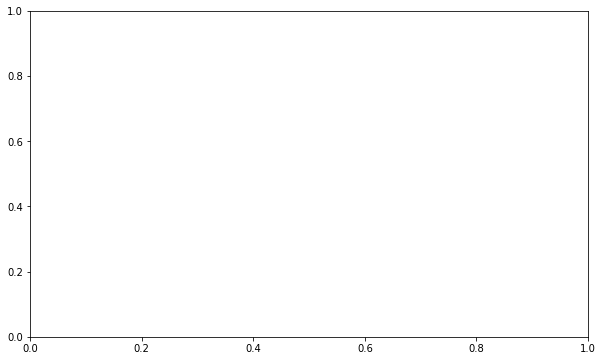

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="Municipio", y="Positivos", data=df_max, palette="rainbow")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show()

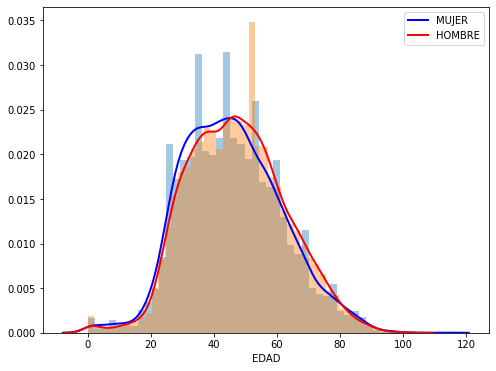

In [46]:
#Distribución de las edades que han dado positivo entre hombres y mujeres
df_pos=df2[df2["RESULTADO"]==1]
plt.subplots(figsize=(8,6))
sns.distplot(df_pos[df_pos["SEXO"]==1]["EDAD"], kde_kws={"color": "b", "lw": 2, "label": "MUJER"})
sns.distplot(df_pos[df_pos["SEXO"]==0]["EDAD"], kde_kws={"color": "r", "lw": 2, "label": "HOMBRE"})
plt.show()

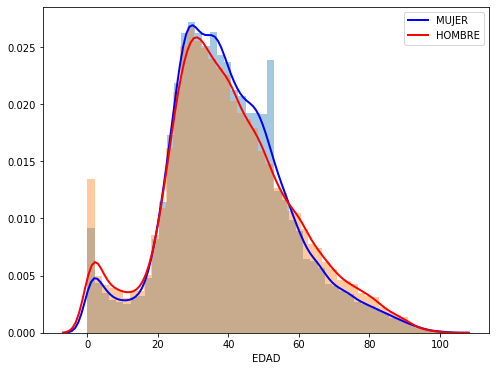

In [47]:
#Distribución de las edades que han dado negativo entre hombres y mujeres
df_pos=df2[df2["RESULTADO"]==0]
plt.subplots(figsize=(8,6))
sns.distplot(df_pos[df_pos["SEXO"]==1]["EDAD"], kde_kws={"color": "b", "lw": 2, "label": "MUJER"})
sns.distplot(df_pos[df_pos["SEXO"]==0]["EDAD"], kde_kws={"color": "r", "lw": 2, "label": "HOMBRE"})
plt.show()

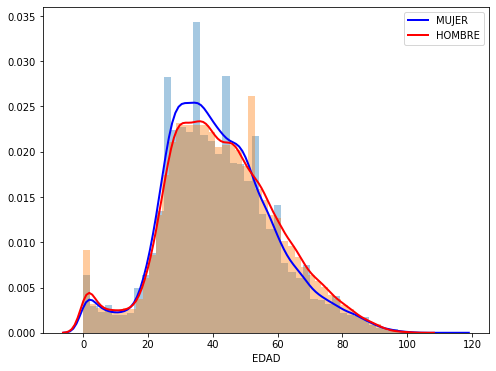

In [48]:
#Distribución de las personas que han fallecido entre hombres y mujeres
df_def=df2[df2["FECHA_DEF"]!=np.nan]
plt.subplots(figsize=(8,6))
sns.distplot(df_def[df_def["SEXO"]==1]["EDAD"], kde_kws={"color": "b", "lw": 2, "label": "MUJER"})
sns.distplot(df_def[df_def["SEXO"]==0]["EDAD"], kde_kws={"color": "r", "lw": 2, "label": "HOMBRE"})
plt.show()

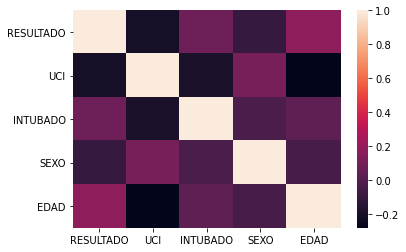

In [49]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(df[["RESULTADO","UCI","INTUBADO","SEXO","EDAD"]].corr())

### MAPAS FOLIUM

In [50]:
import numpy as np  
import pandas as pd 
import folium

In [51]:
df2.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'Clave Estado', 'Clave Municipio',
       'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO', 'MIGRANTE',
       'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI', 'MUERTES', 'ENF',
       'TIEMPO_UCI', 'Estado', 'Municipio', 'Latitud', 'Longitud', 'Error'],
      dtype='object')

In [51]:
df3=df2[df2["RESULTADO"]==1]
df3=df3.groupby(["Estado","Municipio"],as_index=False)["RESULTADO"].sum()#[["Estado","Municipio","RESULTADO","Latitud","Longitud"]]
df3["Latitud"]=dfm["Latitud"]
df3["Longitud"]=dfm["Longitud"]
lista_map=[]
for i,j in zip(df3["Municipio"],df3["RESULTADO"]):
    lista_map.append([i,j])
df3["info_map"]=lista_map
df3

,Estado,Municipio,RESULTADO,Latitud,Longitud,info_map
0,Aguascalientes,Aguascalientes,233,21.880655,-102.2961323,"[Aguascalientes, 233]"
1,Aguascalientes,Asientos,2,22.132107,-102.0952559,"[Asientos, 2]"
2,Aguascalientes,Calvillo,9,21.846512,-102.7185731,"[Calvillo, 9]"
3,Aguascalientes,El Llano,1,22.370515,-102.3120085,"[El Llano, 1]"
4,Aguascalientes,Jesús María,13,21.934555,-102.4684517,"[Jesús María, 13]"
...,...,...,...,...,...,...
956,Zacatecas,Tepechitlán,5,21.113732,-105.0388923,"[Tepechitlán, 5]"
957,Zacatecas,Tepetongo,7,22.810824,-105.2032725,"[Tepetongo, 7]"
958,Zacatecas,Trancoso,2,21.029057,-104.327737,"[Trancoso, 2]"
959,Zacatecas,Villa Hidalgo,1,21.202564,-104.4450318,"[Villa Hidalgo, 1]"


In [19]:
#En un mapa agrega un pop-up text con el número de positivos para cada estado
df_pos=df2[df2["RESULTADO"]==1]
df_pos=df_pos.groupby(["Estado"],as_index=False).count().iloc[:,0:2]
df_pos=df_pos.rename(columns={"FECHA_ACTUALIZACION":"POSITIVOS"})

df_pos= pd.merge(left=df_pos, right=dfe, on =["Estado"])

KeyError: 'Municipio'

In [14]:
import json
df_json=pd.read_json("/Users/rociocuestapedraz/Desktop/proyecto covid/mexico.json")

In [15]:
#Cambiar nombres de Estado igual que json:
json_estados=['Baja California','Baja California Sur','Coahuila De Zaragoza','Chihuahua','Durango','Sinaloa','Sonora',
             'Zacatecas','Nuevo Leon','San Luis Potosi','Tamaulipas','Aguascalientes','Colima','Jalisco','Michoacan De Ocampo',
             'Nayarit','Campeche','Oaxaca','Puebla','Tabasco','Tlaxcala','CDMX','Guanajuato','Guerrero','Hidalgo','Estado De Mexico',
             'Morelos','Queretaro','Veracruz De Ignacio De La Llave','Chiapas','Quintana Roo','Yucatan']
json_estados.sort()

In [16]:
df_pos=df_pos.replace("Ciudad De México",'CDMX')
df_pos=df_pos.replace("Querétaro",'Queretaro')
df_pos=df_pos.replace("Estádo De México","Estado De Mexico")
df_pos=df_pos.replace("Yucatán","Yucatan")
df_pos=df_pos.replace("Michoacán De Ocampo","Michoacan De Ocampo")
df_pos=df_pos.replace("San Luis Potosí","San Luis Potosi")
df_pos=df_pos.replace("Nuevo León","Nuevo Leon")

df_pos

,Estado,POSITIVOS,Clave Estado,Latitud,Longitud,Error
0,Aguascalientes,10,1,21.8818,-102.291,ok
1,Baja California,108,2,29.95,-115.116667,ok
2,Baja California Sur,10,3,25.625057,-111.700684,ok
3,Campeche,6,4,19.32920555,-89.94391483,ok
4,Chiapas,21,7,16.5000001,-92.5000001,ok
5,Chihuahua,66,8,28.5000001,-106.0000001,ok
6,CDMX,430,9,19.4326296,-99.1331785,ok
7,Coahuila De Zaragoza,19,5,27.32622,-102.163658,ok
8,Colima,5,6,19.24997,-103.72714,ok
9,Durango,13,10,24.833333,-104.833333,ok


In [39]:
latitude=23.634501
longitude=-102.552784
mexico_map = folium.Map(location=[latitude, longitude], zoom_start=5)
mexico_map

In [40]:
positivos = folium.map.FeatureGroup()
X=df3['Latitud']
Y=df3['Longitud']
for lat, lng, in zip(X, Y): #la columna Y y X son las coordenadas 
    positivos.add_child(
            folium.CircleMarker([lat, lng],
            radius=5, # difine el tamaño de los circulos
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
mexico_map.add_child(positivos)

In [52]:
from folium import plugins

# Comenzamos de nuevo con una copia limpia del mapa de San Francisco
mexico_map = folium.Map(location = [latitude, longitude], zoom_start = 5)

# Creamos una instancia de un objeto de clúster (mark cluster object)
#de marca para los incidentes en el marco de datos

positivos = plugins.MarkerCluster().add_to(mexico_map)

#Recorre los 100 crímenes y agrega a cada uno al feature group de incidentes

for lat, lng, label, in zip(X,Y,df3["info_map"]):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(positivos)

# display map
mexico_map

In [ ]:
# Crea un choromap para ver por colores el número de positivos para cada estado.

In [38]:
# crea un mapa mundial
mexico_geo= r'/Users/rociocuestapedraz/Desktop/proyecto covid/mexico.json'
latitude=23.634501
longitude=-102.552784
mexico_map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='Mapbox Bright')
mexico_map

In [41]:
#Generar un choropleth map utilizando la inmigración total de cada país a Canadá desde 1980 hasta 2013
mexico_map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='Mapbox Bright')
mexico_map
mexico_map.choropleth(
    geo_data=mexico_geo,
    threshold_scale=[0,100,200,500,1000,3000,7000],
    data=df_pos,
    columns=['Estado','POSITIVOS'],
    key_on='feature.properties.name',
     fill_color='Reds', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='Positivos COVID MEXICO',
)

mexico_map

#### Sanidad privada-publica

In [125]:
df2["SECTOR"]=df2["SECTOR"].replace([2,3,4,6,7,8,10,11,12,13],"PUBLICA")
df2["SECTOR"]=df2["SECTOR"].replace([1,9],"PRIVADA")

In [126]:
df2["SECTOR"].unique()

array(['PUBLICA', 'PRIVADA', 99], dtype=object)

In [127]:
#Pacientes totales en sanidad publica:
df2[df2["SECTOR"]=="PUBLICA"].shape[0]

95577

In [128]:
#Pacientes totales en sanidad privada:
df2[df2["SECTOR"]=="PRIVADA"].shape[0]

3801

In [129]:
#Positivos en sanidad publica:
df2[(df2["RESULTADO"]==1)&(df2["SECTOR"]=="PUBLICA")].shape[0]

23574

In [130]:
#Positivos en sanidad privada:
df2[(df2["RESULTADO"]==1)&(df2["SECTOR"]=="PRIVADA")].shape[0]

1198

In [131]:
#porcentaje muertes en privada
total_pos=df2[(df2["RESULTADO"]==1)&(df2["SECTOR"]=="PRIVADA")].shape[0]
total_muertes=df2[(df2["RESULTADO"]==1)&(df2["SECTOR"]=="PRIVADA")&(df2["FECHA_DEF"]!="01/01/2000")].shape[0]
print((total_muertes/total_pos)*100,"%")
print(total_muertes)

3.923205342237062 %
47


In [135]:
(47/3801)*100

1.2365167061299658

In [132]:
#Porcentaje de muertes en la publica
total_pos=df2[(df2["RESULTADO"]==1)&(df2["SECTOR"]=="PUBLICA")].shape[0]
total_muertes=df2[(df2["RESULTADO"]==1)&(df2["SECTOR"]=="PUBLICA")&(df2["FECHA_DEF"]!="01/01/2000")].shape[0]
print((total_muertes/total_pos)*100,"%")
print(total_muertes)


9.391702723339272 %
2214


In [133]:
#Tiempo promedio en uci publica
muertes_publ=df2[(df2["FECHA_DEF"]!="01/01/2000")&(df2["SECTOR"]=="PUBLICA")]
tiempo_uci=muertes_publ["FECHA_DEF"]- muertes_publ["FECHA_INGRESO"]
tiempo_uci.mean()

Timedelta('5 days 05:31:55.596330')

In [134]:
#Tiempo promedio en uci privada
muertes_pri=df2[(df2["FECHA_DEF"]!="01/01/2000")&(df2["SECTOR"]=="PRIVADA")]
tiempo_uci=muertes_pri["FECHA_DEF"]- muertes_pri["FECHA_INGRESO"]
tiempo_uci.mean()

Timedelta('4 days 17:54:37.611940')